## SVM Implementation from scratch

In [1]:
# Import python packages to ease the task 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

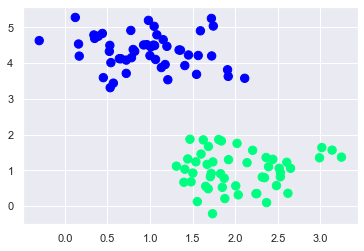

In [2]:
# Now we need some data so we can work with our SVM program
# Below program will create two cluster with 100 observation
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.50)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 70, cmap = 'winter')

### Awesome  we now we have data and packages where we can work to create a svm program

In this classification problem which have two dimension data we need to draw a best fit straight line seprating the two sets of data ,and thereby create a model for ckassification . Now we can see this is not simple there is more than one possible dividing line that can perfectly discriminate between the two classes!  

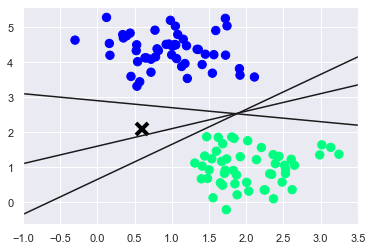

In [3]:
xfit =np.linspace(-1,3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 70, cmap = 'winter')  # just ploting the data 
plt.plot([0.6], [2.1], 'x', color = 'black', markeredgewidth = 4, markersize = 12) #ploting the data with marker
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:  # creating a loop to create multiple line 
    plt.plot(xfit, m * xfit + b, '-k')  # m*xfit+b is the formula of line
plt.xlim(-1, 3.5);

We can see that there are three differenet seprater then how we will select the best fit line.
Goal is very simple we need to find the maximum margin hyperplane so, we draw a margin of some width up to the nearest point

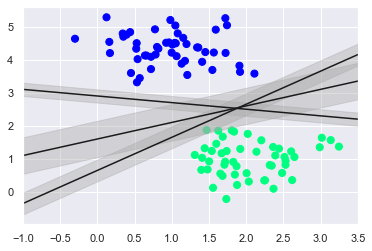

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'winter')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
   yfit = m * xfit + b      # formula of line 
   plt.plot(xfit, yfit, '-k')   # plot the line
   plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color = '#AAAAAA', alpha = 0.4)# ploting the margin
plt.xlim(-1, 3.5);

Nice we have come this far from inserting a data to ploting a margin now what ?
As we know from the intro of SVM we need a SVC support vector classifier 
we obtain our support vector by margin Now lets put the SVM package from Sklearn
Let's see the result of an actual fit to this data

In [5]:
from sklearn.svm import SVC # importing support vector classifier
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

lets create a decision function which help us to give a better visualization by plotting a two dimensional SVC

In [6]:
def decision_function(model, ax = None, plot_support = True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # For evaluating model, we need to create grid as follows −
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], s = 300, linewidth = 1, facecolors = 'none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


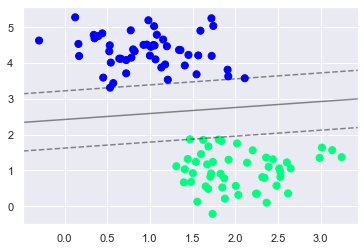

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
decision_function(model);

Can u see the datapoint which are on dashed line(margin) they are our support vector.

In [9]:
model.support_vectors_  

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

Support vector position matter most ,any points further from the margin, which are on the correct side do not 
modify the fit  because they don't contribute to the loss function used to fit the model.


# Happy Learning..:)
